In [36]:
import statistics 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import joblib
from sklearn.metrics import accuracy_score
import numpy as np


# part one: finding and loading the data 
sp_data=pd.read_csv("dataset/sp500_stocks.csv")
sp_data


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,59.318886,83.019997,83.449997,82.669998,83.089996,3043700.0
1,2010-01-05,MMM,58.947342,82.500000,83.230003,81.699997,82.800003,2847000.0
2,2010-01-06,MMM,59.783295,83.669998,84.599998,83.510002,83.879997,5268500.0
3,2010-01-07,MMM,59.826176,83.730003,83.760002,82.120003,83.320000,4470100.0
4,2010-01-08,MMM,60.247749,84.320000,84.320000,83.300003,83.690002,3405800.0
...,...,...,...,...,...,...,...,...
1638021,2022-12-12,ZTS,152.860001,152.860001,154.470001,152.179993,154.070007,1851800.0
1638022,2022-12-13,ZTS,154.970001,154.970001,158.479996,152.080002,158.210007,3655900.0
1638023,2022-12-14,ZTS,151.779999,151.779999,156.100006,151.229996,153.770004,2182000.0
1638024,2022-12-15,ZTS,148.710007,148.710007,151.350006,148.539993,149.509995,1947400.0


In [7]:
x=sp_data.drop(columns=['Symbol','Volume','Close','High', 'Low'])
x

,Date,Adj Close,Open
0,2010-01-04,59.318886,83.089996
1,2010-01-05,58.947342,82.800003
2,2010-01-06,59.783295,83.879997
3,2010-01-07,59.826176,83.320000
4,2010-01-08,60.247749,83.690002
...,...,...,...
1638021,2022-12-12,152.860001,154.070007
1638022,2022-12-13,154.970001,158.210007
1638023,2022-12-14,151.779999,153.770004
1638024,2022-12-15,148.710007,149.509995


In [8]:
y=sp_data['Close']
y

0           83.019997
1           82.500000
2           83.669998
3           83.730003
4           84.320000
              ...    
1638021    152.860001
1638022    154.970001
1638023    151.779999
1638024    148.710007
1638025    144.460007
Name: Close, Length: 1638026, dtype: float64

In [9]:
z = sp_data['Close'].fillna(0)

avg_open = statistics.mean(z) 
avg_open


91.62201820436397

In [10]:
hmean = statistics.harmonic_mean(z)
hmean

0

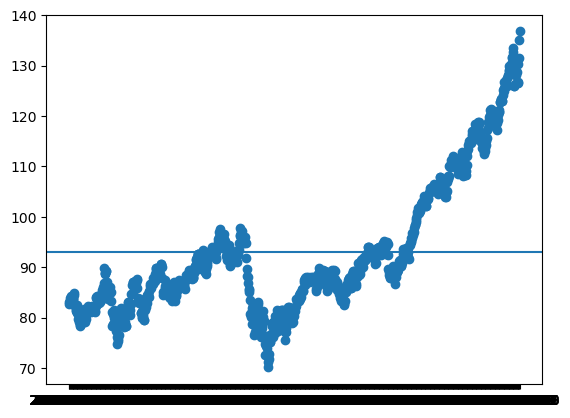

In [44]:
newDf=sp_data.iloc[:1000]
newDf
#create scatter plot
plt.scatter(newDf.Date, newDf.Open)

#add horizontal line at mean value of y
plt.axhline(y=np.nanmean(newDf.Open))